## BUILDING A HEART DISEASE CLASSIFIER

## Problem Definition:
In this project, I will attempt to build a model that predicts whether a person has heart disease or not given his or her inputs (attributes).

## Data:
The original data came from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) from UCI Machine Learning Repository.

Howevever, I have downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/).
The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called **features**) are the variables that I will use to predict our **target variable**.

## Feature Dictionary:

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Evaluation Metric:
This project is more like a proof of concept, if I can reach a 95% accuracy at predicting whether a person has heart disease or not, The project will be pursued, Though Evaluation metric may change over time based on  experimental outcomes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt



df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### EXPLORATORY DATA ANALYSIS

In [2]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

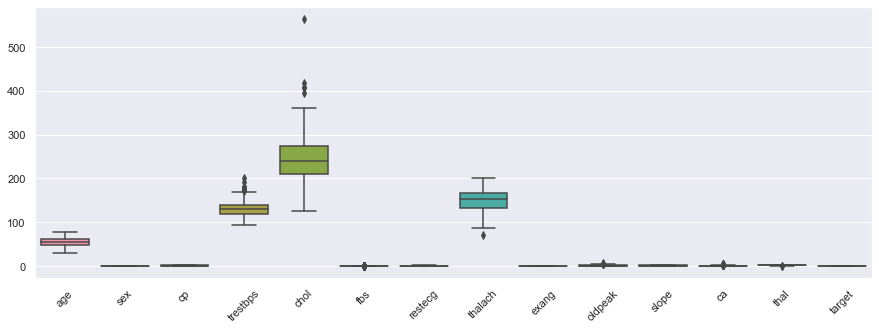

In [5]:
sns.set(rc={"figure.figsize":(15,5)})
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

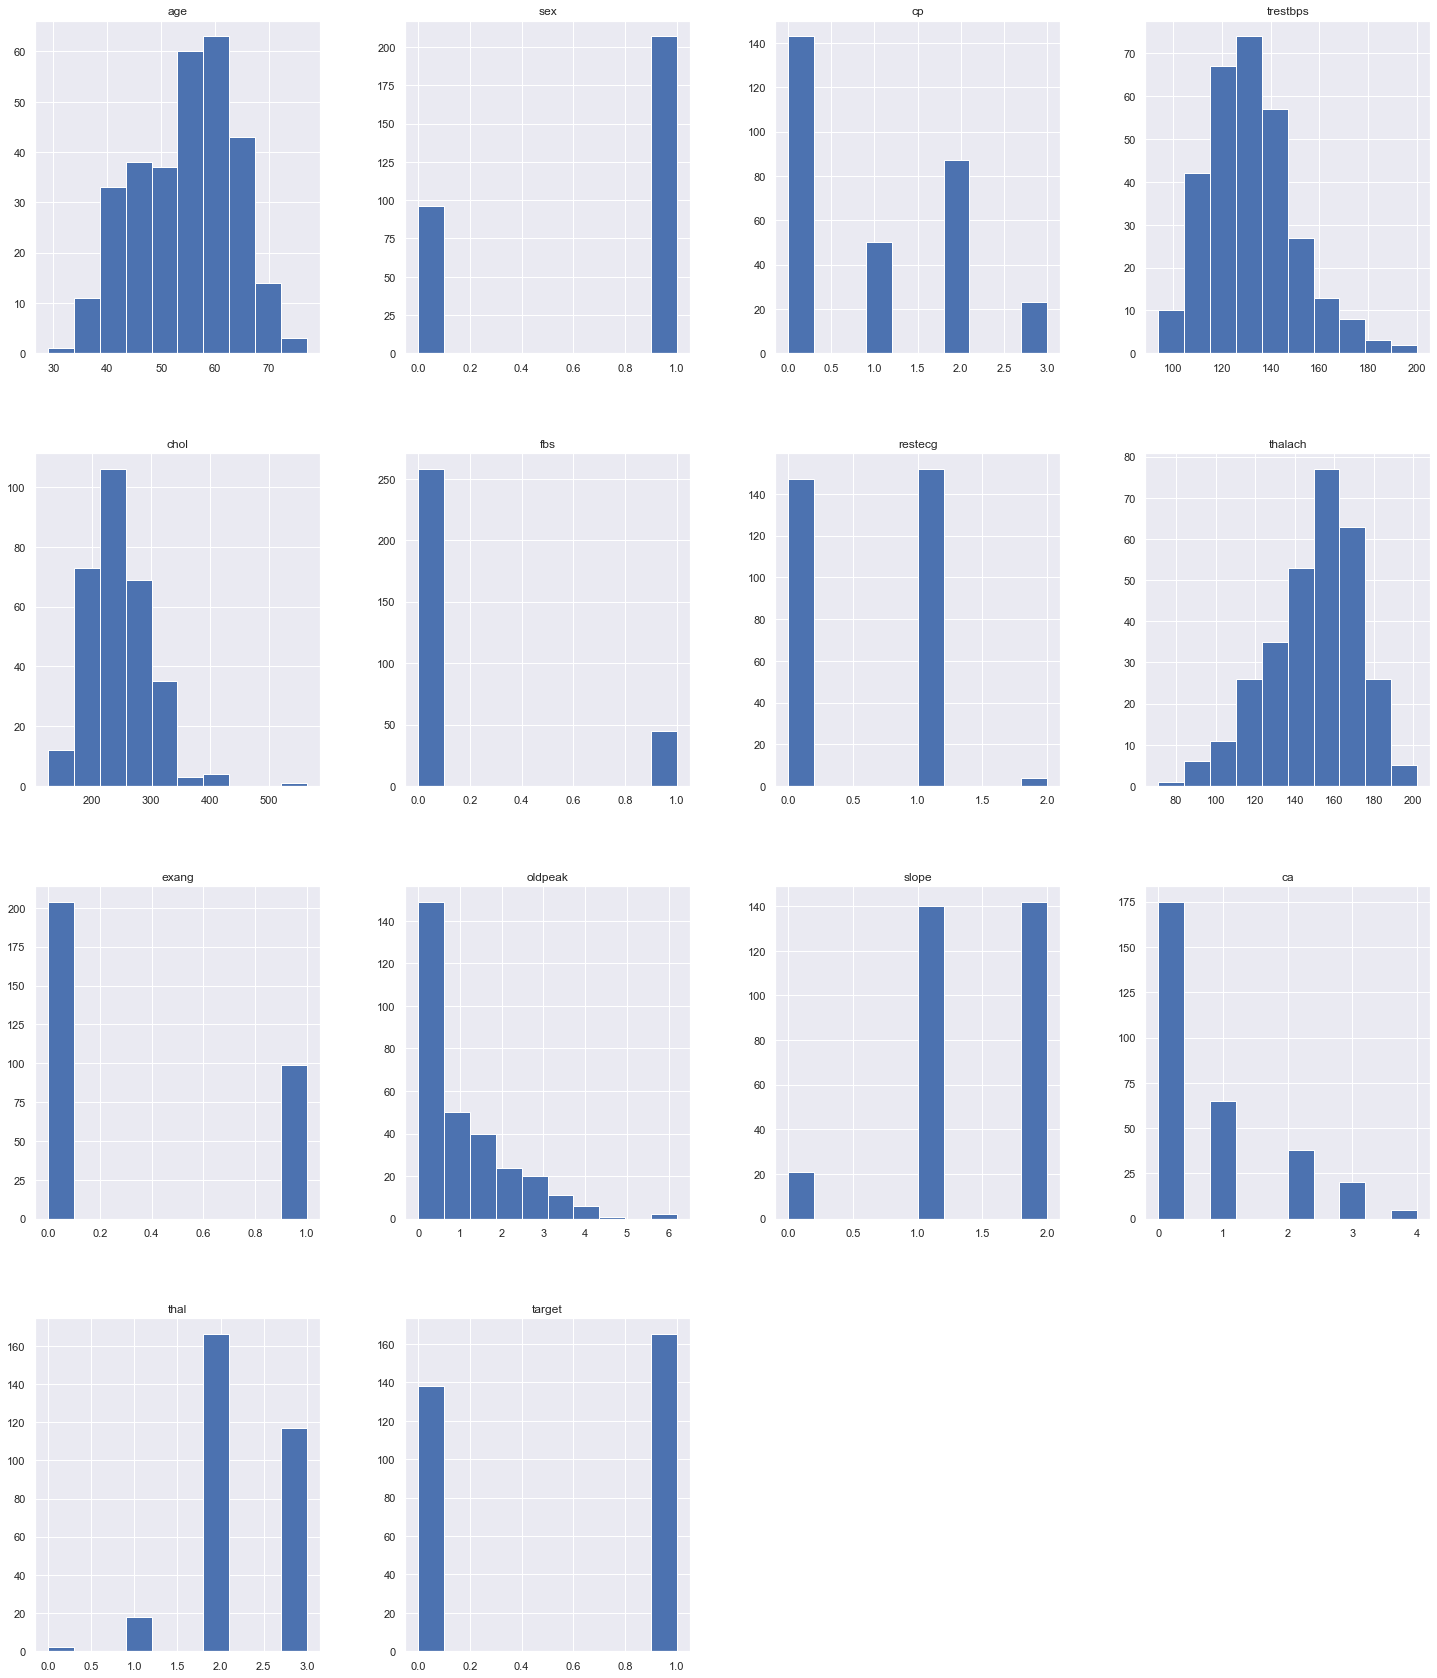

In [6]:
df.hist(figsize=(25, 30));

#### Interpretation:
* There are a total of 303 records without any missing data in our dataset.
* Ages of people in the sample data are from 29 to 77 years.
* 50 percent of people in the dataset are middle aged, which means our model may not perform well predicting presence of heart disease for children or very old people.
* We have more records of men(207) than women(96) in this dataset.
* There is a slight inbalance in  the number of positives(168) and number of negatives(128) but it is good enough for our experimental purposes.
* Half of our dataset has the chest pain angina (cp) which is non heart related
* Half of the dataset have their blood pressure (trestbps) pegged at the normal 130 mmHg
* Half of the dataset have a cholesterol a little above 200 which is the healthy baseline for cholesterol levels
* Majority of the dataset do not show any signs of fasting blood sugar above 120mg/Dl, so its predictive quality in this dataset might come into question.
* Half of the dataset has something quite pertinent to note about thier electrocardiographic result
* Half of the dataset has maximum heart rate acheived at 153
* Half of the dataset do not have excercise induced Angina
* Half of the dataset has an oldpeak value pegged at 0.8.
* Half of the dataset has a slope of 1.0 which signals healthy heart
* Half of the dataset has zero colored blood vessels as measured by fluoroscopy
* Half of the dataset has normal Thalium stress result.
* From the distribution and boxplot, we will find out that our data is evenly distributed, without much outliers in the features, except in the case of deviation in the patient's result.

### Measuring Relationships among Features
#### Sex of the Sample against Presence of Heart Disease

In [7]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


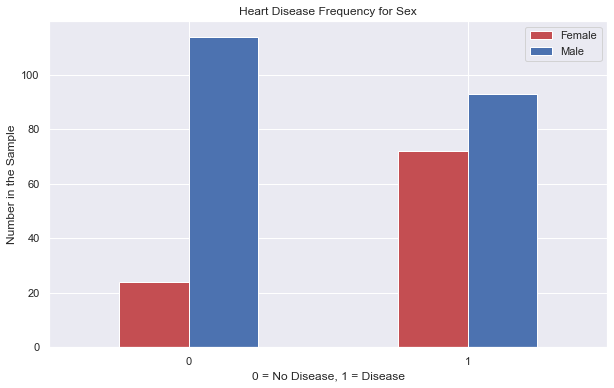

In [8]:
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", color=['r', 'b'], figsize=(10,6))
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Number in the Sample")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

There are about a total of 100 women in the dataset and 70% of them shows presence of heart disease, there are about 200 men in this dataset and 50% percent of them show presence of heart disease.
*We can infer that at the end of this project that the chance of predicting presence of heart disease:* 
1. For female is about 75 percent
2. For Male is about 50 percent
3. For Anyone is the average of 75 and 50 which is about 62.2 percent.
We can then attempt to beat this Baseline hypothesis using machine learning.



#### Comparing Age vs Max Heart Rate Achieved For Heart Disease

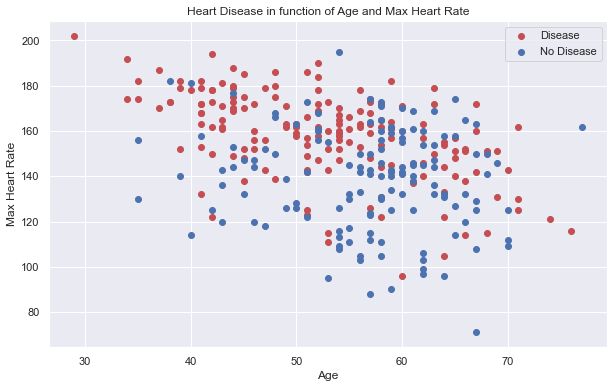

In [9]:
plt.figure(figsize=(10,6))

# Positive Samples
plt.scatter(df["age"][df.target==1], df['thalach'][df.target==1], color='r')

# Negative samples
plt.scatter(df["age"][df.target==0], df['thalach'][df.target==0], color='b')
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

*From the above plot:*
1. We can see thst max heart rate came down very very slightly with age
2. Very High heart rate suggests the presence of heart disease more as opposed to very low heart rate
3. Clusters of heart disease occurs highly when max heart achieved is from 140 and above.
4. Our dataset is evenly distributed in explaining presence and non-presence of heart disease


#### Heart Disease Frequency Per Chest Pain type

In [11]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


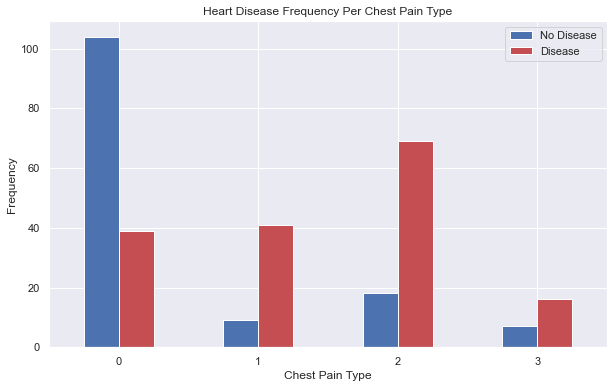

In [12]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["b", "r"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

*From our data dictionary, the different levels of chest pain are.*
* cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
    
We can see that if you have chest pain of type 1 and 2, it increases your chance of having heart disease as opposed to having the type 0 and 3, not withstanding the fact that our data dictionary categorically emphasizes that they are both non- heart related. Maybe the guidiance of a subject matter expert could be sought after to explain this phenomenon, Nevertheless, its properties may come in handy during model building.



#### Measuring Correlation among the Features

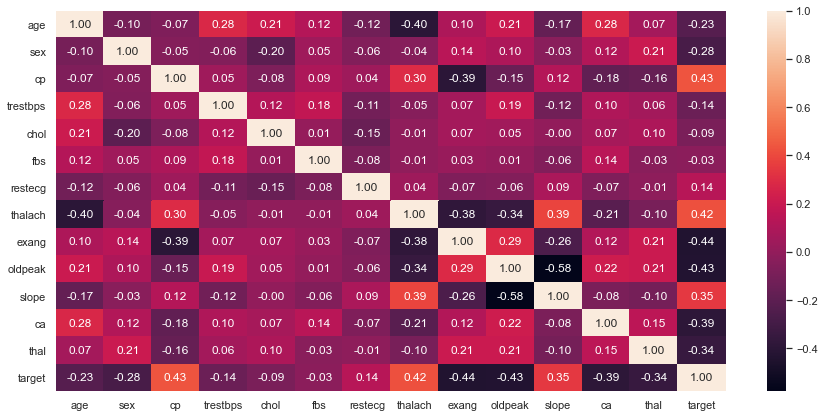

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", );

1. Chest pain(cp), maximum heart rate achieved (thalach), and slope are the features that have the highest positive correlation with the presence of heart disease.
2. Excercise induced angina (exang), depression induced by exercise relative to rest (oldpeak), coloured vessels by fluoroscopy(ca) and thalium stress result (thal) have the highest negative correlation to the presence of heart disease.
3. Maximum heart rate achieved and Chest pain are positively correlated by 30 percent.
4. cholesterol level(chol), coloured vessel by fluoroscopy(ca), and resting blood pressure on admission to hospital (trestbs) are all positively correlated to age at a percentage above 21 percent.
5. *IT IS ALSO IMPORTANT TO REMIND OURSELVES THAT CORRELATION DOES NOT IMPLY CAUSATION*



##### The next line of action will be to proceed to model building which can be found in `modellig-Heart-disease-classification.ipynb`